In [64]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [2]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report  

In [3]:
#Read the file
bank=pd.read_csv('bank-full.csv',sep=';')
bank 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank=bank.rename({'y':'CSTD'},axis=1)
bank 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,CSTD
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
#Information about data types
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  CSTD       45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#Convert the categorical column into numerical format by using FACTORIZED Function
bank[['job','marital','education','default','housing','loan','contact','month','poutcome','CSTD']]=bank[['job','marital','education','default','housing','loan','contact','month','poutcome','CSTD']].apply(lambda x: pd.factorize(x)[0])
bank  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,CSTD
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  CSTD       45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [8]:
#Check the null values is present or not in dataset
#If null values present in data set then fill those nan values with mode of the categorical data column & mean or median of numerical data column in[LOGISTIC REGRESSION]
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
CSTD         0
dtype: int64

In [9]:
#Cal. all statistical information regarding dataset
bank.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,CSTD
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.526133,0.513238,1.049944,0.018027,1362.272058,0.444162,0.160226,0.776293,15.806419,2.940722,258.163080,2.763841,40.197828,0.580323,0.290062,0.116985
std,10.618762,3.098343,0.692948,0.968986,0.133049,3044.765829,0.496878,0.366820,0.549747,8.322476,3.179741,257.527812,3.098021,100.128746,2.303441,0.698469,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,0.000000,1.000000,0.000000,448.000000,0.000000,0.000000,1.000000,16.000000,2.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,6.000000,1.000000,1.000000,0.000000,1428.000000,1.000000,0.000000,1.000000,21.000000,5.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


<AxesSubplot:xlabel='CSTD', ylabel='job'>

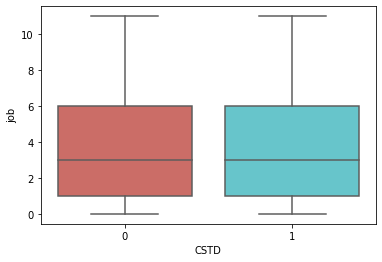

In [10]:
#Create boxplot [0= client not subscribed a term deposit & 1= client subscribed a term deposit] based on their job
sb.boxplot(x="CSTD",y="job",data=bank,palette="hls")

<AxesSubplot:xlabel='CSTD', ylabel='count'>

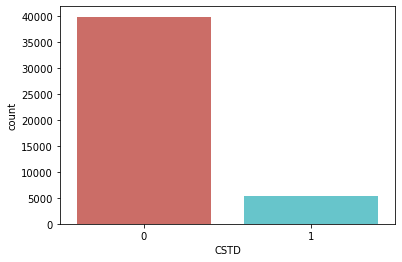

In [11]:
#Create boxplot [0= client not subscribed a term deposit & 1= client subscribed a term deposit] based on all variables
sb.countplot(x="CSTD",data=bank,palette="hls")  

In [12]:
#Cal.No. of observation based on job categories wrt [0= No & 1= Yes] for subscribing the term deposit
pd.crosstab(bank.CSTD,bank.job) 

job,0,1,2,3,4,5,6,7,8,9,10,11
CSTD,,,,,,,,,,,,
0,8157,6757,1364,9024,254,1748,4540,3785,1392,1101,1131,669
1,1301,840,123,708,34,516,631,369,187,202,109,269


<AxesSubplot:xlabel='CSTD'>

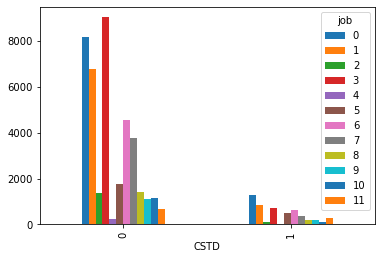

In [13]:
#Plot the barplot to show the how many clients not subscribing term deposit & how many clients subscribing term deposit based on their job
pd.crosstab(bank.CSTD,bank.job).plot(kind = 'bar')

<AxesSubplot:xlabel='housing', ylabel='count'>

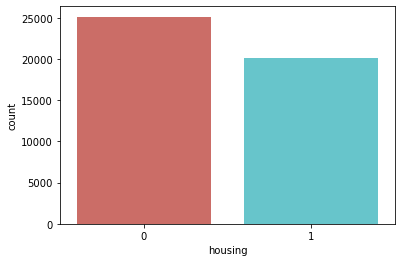

In [14]:
#Create barplot for housing [0= yes, 1= no]
sb.countplot(x="housing",data=bank,palette="hls") 

<AxesSubplot:xlabel='loan', ylabel='count'>

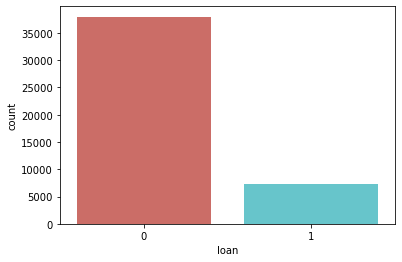

In [15]:
#loan[0= no, 1= yes]
sb.countplot(x="loan",data=bank,palette="hls") 

In [16]:
#Cal.No. of observation based on loan[0= no, 1= yes] wrt housing[0= yes & 1= no] for are they able to subscribing the term deposit or not?
pd.crosstab(bank.housing,bank.loan) 

loan,0,1
housing,,
0,20763,4367
1,17204,2877


<AxesSubplot:xlabel='housing'>

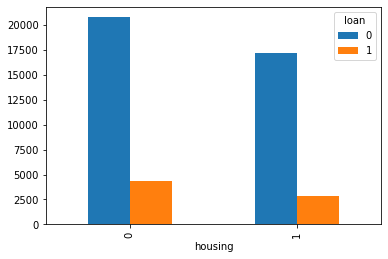

In [17]:
#Plot the barplot to showing No. of observation gone under loan[0= no, 1= yes] because of their housing[0= yes & 1= no] so are they able to subscribe term deposit or not?
pd.crosstab(bank.housing,bank.loan).plot(kind = 'bar')

<AxesSubplot:xlabel='loan', ylabel='count'>

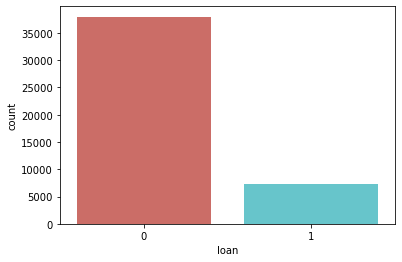

In [18]:
#Create barplot for loan [0= no, 1= yes]
sb.countplot(x="loan",data=bank,palette="hls")

<AxesSubplot:xlabel='default', ylabel='count'>

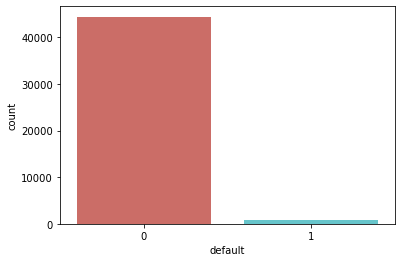

In [19]:
#Default [0= no, 1= yes]
sb.countplot(x="default",data=bank,palette="hls") 

In [20]:
#Cal.No. of observation based on default[0= no, 1= yes] wrt loan[0= no & 1= yes] for are they able to subscribing the term deposit or not?
pd.crosstab(bank.default,bank.loan) 

loan,0,1
default,,
0,37453,6943
1,514,301


<AxesSubplot:xlabel='default'>

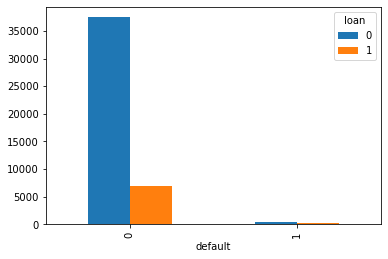

In [21]:
#Plot the barplot to showing No. of observation gone under defaul[0= no, 1= yes] wrt their loan[0= no & 1= yes] so are they able to subscribe term deposit or not?
pd.crosstab(bank.default,bank.loan).plot(kind = 'bar')

In [22]:
# Model building 
from sklearn.linear_model import LogisticRegression
bank.shape 

(45211, 17)

In [23]:
X = bank.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
Y = bank.iloc[:,16]
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Anand Jagdale\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# coefficients of features(bita0, bita1....& so on)
classifier.coef_ 

array([[-4.36956329e-02, -8.27910419e-02, -4.37958896e-02,
        -1.45925936e-01, -6.73817618e-03,  2.91710254e-05,
         1.43112661e-01, -7.52419123e-02,  3.40210830e-02,
        -2.96052634e-02,  6.40047498e-02,  3.34641507e-03,
        -3.55891690e-01, -9.62199084e-04,  1.25516943e-01,
         2.81774403e-01]])

In [25]:
# Gives the Probability values
#If p-value<50% of threshold value then prediction goes to (-ve)
#If p-value>50% of threshold value then prediction goes to (+ve)
classifier.predict_proba (X) 

array([[0.90281624, 0.09718376],
       [0.91047615, 0.08952385],
       [0.9006812 , 0.0993188 ],
       ...,
       [0.65388181, 0.34611819],
       [0.9362994 , 0.0637006 ],
       [0.42938467, 0.57061533]])

In [26]:
#Plot the predicted values in dataset by creteing new column (y_pred)
y_pred = classifier.predict(X)
bank["y_pred"] = y_pred
bank  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,CSTD,y_pred
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0,0
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0,0
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0,0
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1,0
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1,0
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1,0
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0,0


In [27]:
# Plot the predicted values by compairing the Probability values [0 & 1]
#If p-value<50% of threshold value then prediction goes to (TNR[PV^0=AV^0])
#If p-value>50% of threshold value then prediction goes to (TPR[PV^1=AV^1])
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank,y_prob],axis=1)
new_df  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,CSTD,y_pred,0,1
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0,0,0.902816,0.097184
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0,0,0.910476,0.089524
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0,0,0.900681,0.099319
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0,0,0.946476,0.053524
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0,0,0.873640,0.126360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1,0,0.554320,0.445680
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1,0,0.964764,0.035236
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1,0,0.653882,0.346118
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0,0,0.936299,0.063701


In [28]:
#Applying confusion matrics on (ACTUAL VALUES & PREDICTED VALUES) for comparing
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39083   839]
 [ 4229  1060]]


In [29]:
pd.crosstab(y_pred,Y)

CSTD,0,1
row_0,,
0,39083,4229
1,839,1060


In [30]:
#type(y_pred)
accuracy = sum(Y==y_pred)/bank.shape[0]
accuracy 

0.8879033863440313

In [31]:
#Create classification report for finding the accuracy of model
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred)) 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.20      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.59      0.62     45211
weighted avg       0.86      0.89      0.86     45211



In [32]:
#Apply the roc auc score on (ACTUAL VALUES & PREDICTED VALUES) by using DEFAULT THRESHOLD value(50%)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score

0.58969998824234

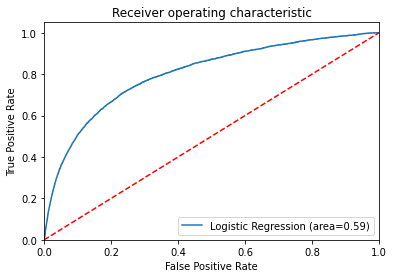

In [33]:
#Find out fpr, tpr & optimum threshold value by plot ROC cuve
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

In [34]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 

In [35]:
y_prob1

,0
0,0.097184
1,0.089524
2,0.099319
3,0.053524
4,0.126360
...,...
45206,0.445680
45207,0.035236
45208,0.346118
45209,0.063701


In [36]:
import statsmodels.api as sm  

In [37]:
logit = sm.Logit(Y, X) 

In [38]:
#To identify significant or insignificant variables based on compairing their p-values with significance level(0.05)
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.283349
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   CSTD   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Thu, 19 May 2022   Pseudo R-squ.:                  0.2148
Time:                        17:17:48   Log-Likelihood:                -12810.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0576      0.001    -47.035      0.000      -0.060      -0.055
job           -0.0358      0.005     -6.875      0.000      -0.046      -0.026
marital       -0.1908      0.025     -7.637      0.000      -0.240      -0.142
education     -0.2065      0.020    -10.276      0.000      -0.246      -0.167
default       -0.3947      0.157     -2.507      0.012      -0.703      -0.086
balance     1.224e-05   4.91e-06      2.493      0.013    2.62e-06    2.19e-05
housing        0.7301      0.035     20.819      0.000       0.661       0.799
loan          -0.8420      0.056    -15.137      0.000      -0.951      -0.733
contact        0.0988      0.037      2.635      0.008       0.025       0.172
day           -0.0396      0.002    -20.816      0.000      -0.043      -0.036
month          0.0479      0.005      9.238      0.000       0.038       0.058
duration       0.0034   5.77e-05     59.056      0.000       0.003       0.004
campaign      -0.2242      0.011    -19.871      0.000      -0.246      -0.202
pdays         -0.0027      0.000    -12.165      0.000      -0.003      -0.002
previous      -0.0091      0.008     -1.141      0.254      -0.025       0.007
poutcome       0.9049      0.026     34.282      0.000       0.853       0.957
==============================================================================
"""

In [39]:
fpr 

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.97895897e-01, 9.97895897e-01, 1.00000000e+00])

In [40]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [41]:
#Build model again after excluding insignificant variable
# Model building 
from sklearn.linear_model import LogisticRegression
bank.shape 

(45211, 18)

In [42]:
#Excluding insignificant variable (Previous) column no.14
X = bank.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15]]
Y = bank.iloc[:,16]
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Anand Jagdale\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
# coefficients of feature
classifier.coef_ 

array([[-4.22530428e-02,  3.97471968e-03, -6.86196868e-02,
        -2.23618061e-01, -1.15154282e-02,  2.74649793e-05,
         2.47410814e-01, -1.28631489e-01,  6.24027428e-02,
        -3.35777863e-02,  7.52229839e-02,  3.31717282e-03,
        -4.68940030e-01, -8.89171094e-04,  4.86989592e-01]])

In [44]:
# Probability values
classifier.predict_proba (X) 

array([[0.91514537, 0.08485463],
       [0.92398842, 0.07601158],
       [0.91202357, 0.08797643],
       ...,
       [0.6222118 , 0.3777882 ],
       [0.94428485, 0.05571515],
       [0.67525693, 0.32474307]])

In [45]:
y_pred = classifier.predict(X)
bank["y_pred"] = y_pred
bank  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,CSTD,y_pred
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0,0
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0,0
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0,0
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0,0
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1,0
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1,0
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1,0
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0,0


In [46]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank,y_prob],axis=1)
new_df 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,CSTD,y_pred,0,1
0,58,0,0,0,0,2143,0,0,0,5,0,261,1,-1,0,0,0,0,0.915145,0.084855
1,44,1,1,1,0,29,0,0,0,5,0,151,1,-1,0,0,0,0,0.923988,0.076012
2,33,2,0,1,0,2,0,1,0,5,0,76,1,-1,0,0,0,0,0.912024,0.087976
3,47,3,0,2,0,1506,0,0,0,5,0,92,1,-1,0,0,0,0,0.949154,0.050846
4,33,4,1,2,0,1,1,0,0,5,0,198,1,-1,0,0,0,0,0.863206,0.136794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,0,0,825,1,0,1,17,5,977,3,-1,0,0,1,0,0.597338,0.402662
45207,71,5,2,3,0,1729,1,0,1,17,5,456,2,-1,0,0,1,0,0.963248,0.036752
45208,72,5,0,1,0,5715,1,0,1,17,5,1127,5,184,3,3,1,0,0.622212,0.377788
45209,57,3,0,1,0,668,1,0,2,17,5,508,4,-1,0,0,0,0,0.944285,0.055715


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39129   793]
 [ 4157  1132]]


In [48]:
pd.crosstab(y_pred,Y)

CSTD,0,1
row_0,,
0,39129,4157
1,793,1132


In [49]:
#type(y_pred)
accuracy = sum(Y==y_pred)/bank.shape[0]
accuracy 

0.8905133706398886

In [50]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.59      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score

0.5970826913767534

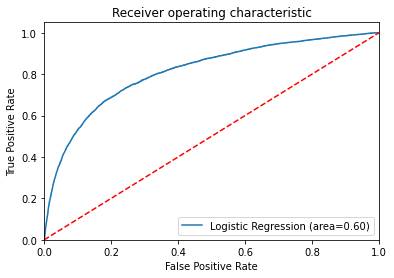

In [52]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

In [53]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 

In [54]:
y_prob1

,0
0,0.084855
1,0.076012
2,0.087976
3,0.050846
4,0.136794
...,...
45206,0.402662
45207,0.036752
45208,0.377788
45209,0.055715


In [55]:
import statsmodels.api as sm 

In [56]:
logit = sm.Logit(Y, X)

In [57]:
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.283367
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   CSTD   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45196
Method:                           MLE   Df Model:                           14
Date:                Thu, 19 May 2022   Pseudo R-squ.:                  0.2148
Time:                        17:17:54   Log-Likelihood:                -12811.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0576      0.001    -47.043      0.000      -0.060      -0.055
job           -0.0357      0.005     -6.867      0.000      -0.046      -0.026
marital       -0.1907      0.025     -7.632      0.000      -0.240      -0.142
education     -0.2063      0.020    -10.266      0.000      -0.246      -0.167
default       -0.3946      0.157     -2.507      0.012      -0.703      -0.086
balance      1.22e-05   4.91e-06      2.483      0.013    2.57e-06    2.18e-05
housing        0.7311      0.035     20.854      0.000       0.662       0.800
loan          -0.8427      0.056    -15.152      0.000      -0.952      -0.734
contact        0.0976      0.037      2.603      0.009       0.024       0.171
day           -0.0395      0.002    -20.794      0.000      -0.043      -0.036
month          0.0478      0.005      9.217      0.000       0.038       0.058
duration       0.0034   5.77e-05     59.069      0.000       0.003       0.004
campaign      -0.2248      0.011    -19.935      0.000      -0.247      -0.203
pdays         -0.0027      0.000    -12.493      0.000      -0.003      -0.002
poutcome       0.8957      0.025     35.620      0.000       0.846       0.945
==============================================================================
"""

In [58]:
fpr

array([0.00000000e+00, 2.50488452e-05, 7.51465357e-05, ...,
       9.98271630e-01, 9.98271630e-01, 1.00000000e+00])

In [59]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [60]:
thresholds 

array([1.99999861e+00, 9.99998610e-01, 9.99853514e-01, ...,
       8.65808304e-08, 8.10304083e-08, 1.16300351e-14])

In [68]:
#Change the THRESHOLDS VALUE for getting more accuracy of predictions
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(classifier.predict_proba(X)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(Y,y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls 

,thresholds,accuracy
1238,4.510165e-01,0.890823
1236,4.511471e-01,0.890823
1244,4.507032e-01,0.890823
1240,4.508498e-01,0.890823
1242,4.507292e-01,0.890823
...,...,...
7554,1.563330e-06,0.120723
7555,1.563167e-06,0.120701
7556,8.658083e-08,0.118511
7557,8.103041e-08,0.118489


In [69]:
#Cal. Best Thresholds Value
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Thresholds=%f' % (best_thresh)) 

Best Thresholds=0.141784


In [72]:
#Cal. accuracy based on Best Thresholds Value
threshold = 0.141784
preds = np.where(classifier.predict_proba(X)[:,1] > threshold, 1, 0)
print(classification_report(Y,preds))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85     39922
           1       0.29      0.72      0.42      5289

    accuracy                           0.77     45211
   macro avg       0.62      0.75      0.64     45211
weighted avg       0.88      0.77      0.80     45211

